# Import Required Libraries
Import necessary libraries such as NumPy, Matplotlib, and the construct_pointcloud function from utils.py.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from utils import construct_pointcloud

# Load Generated Dataset
Load the dataset from the specified .npz file using NumPy's load function.

In [16]:
# Load the dataset from the specified .npz file
dataset_path = 'data/pd_10k_dy.npz'  # Update this path if needed
data = np.load(dataset_path, allow_pickle=True)

# Extract data arrays
starts = data['starts']
goals = data['goals']
obstacles = data['obstacles']
trajectories = data['trajectories']

# Print basic information about the dataset
print(f"Dataset loaded from {dataset_path}")
print(f"Number of samples: {len(starts)}")
print(f"Shape of starts: {starts.shape}")
print(f"Shape of goals: {goals.shape}")
print(f"Shape of obstacles: {obstacles.shape}")
print(f"Shape of trajectories: {trajectories.shape}")

print("obstacles", obstacles[0][0])

Dataset loaded from data/pd_10k_dy.npz
Number of samples: 10000
Shape of starts: (10000, 2)
Shape of goals: (10000, 2)
Shape of obstacles: (10000,)
Shape of trajectories: (10000, 20, 2)
obstacles (0.3251624006853452, 0.7094132054918019, 0.1039220024215844)


# Average Number of Obstacles
Calculate the average number of obstacles in the dataset by iterating through the obstacles array.

In [17]:
# Calculate the average number of obstacles in the dataset
num_obstacles = [len(obs) for obs in obstacles]  # Count the number of obstacles in each sample
average_obstacles = np.mean(num_obstacles)  # Calculate the average
print(f"Average number of obstacles: {average_obstacles:.2f}")  # Print the result

# Show the lowest and highest number of obstacles
min_obstacles = np.min(num_obstacles)
max_obstacles = np.max(num_obstacles)
print(f"Lowest number of obstacles: {min_obstacles}")
print(f"Highest number of obstacles: {max_obstacles}")

Average number of obstacles: 3.41
Lowest number of obstacles: 1
Highest number of obstacles: 6


# Average Distance Between Start and Goal
Compute the average Euclidean distance between the start and goal points for all samples in the dataset.

In [4]:
# Calculate the average Euclidean distance between start and goal points
distances = np.linalg.norm(starts - goals, axis=1)  # Compute distances for all samples
average_distance = np.mean(distances)  # Calculate the average distance
print(f"Average distance between start and goal: {average_distance:.2f}")  # Print the result

Average distance between start and goal: 0.85


# Visualize Point Cloud
Use the construct_pointcloud function to generate and visualize the point cloud for a sample's obstacles.

[(0.16225764756180883, 0.5045296348693566, 0.13098662395133925), (0.14264118537155024, 0.1394983104616756, 0.08782570601679805), (0.03367184293305381, 0.6990103604030928, 0.21267063661477809), (0.8059355881497178, 0.5054028008134126, 0.08169572987433522), (0.8366385246468715, 0.3108286759044183, 0.10079913929913008), (0.6378564799009951, 0.6940879204419396, 0.14770987387327866)]


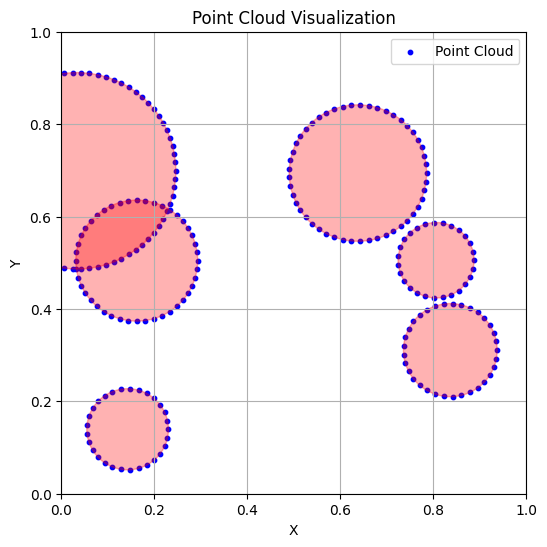

In [22]:
# Visualize Point Cloud

# Select a sample index to visualize the point cloud
sample_index = 100  # Change this index to visualize a different sample
selected_obstacles = obstacles[sample_index]  # Get obstacles for the selected sample

print(selected_obstacles)

# Generate the point cloud for the selected sample's obstacles
num_points = 256  # Number of points to generate in the point cloud
point_cloud = construct_pointcloud(selected_obstacles, num_points)

# Visualize the point cloud
plt.figure(figsize=(6, 6))
plt.scatter(point_cloud[:, 0], point_cloud[:, 1], s=10, c='blue', label='Point Cloud')
plt.xlim(0, 1)
plt.ylim(0, 1)

# Overlay the obstacles
for ox, oy, r in selected_obstacles:
    circle = plt.Circle((ox, oy), r, color='red', alpha=0.3)
    plt.gca().add_patch(circle)

plt.title(f"Point Cloud Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

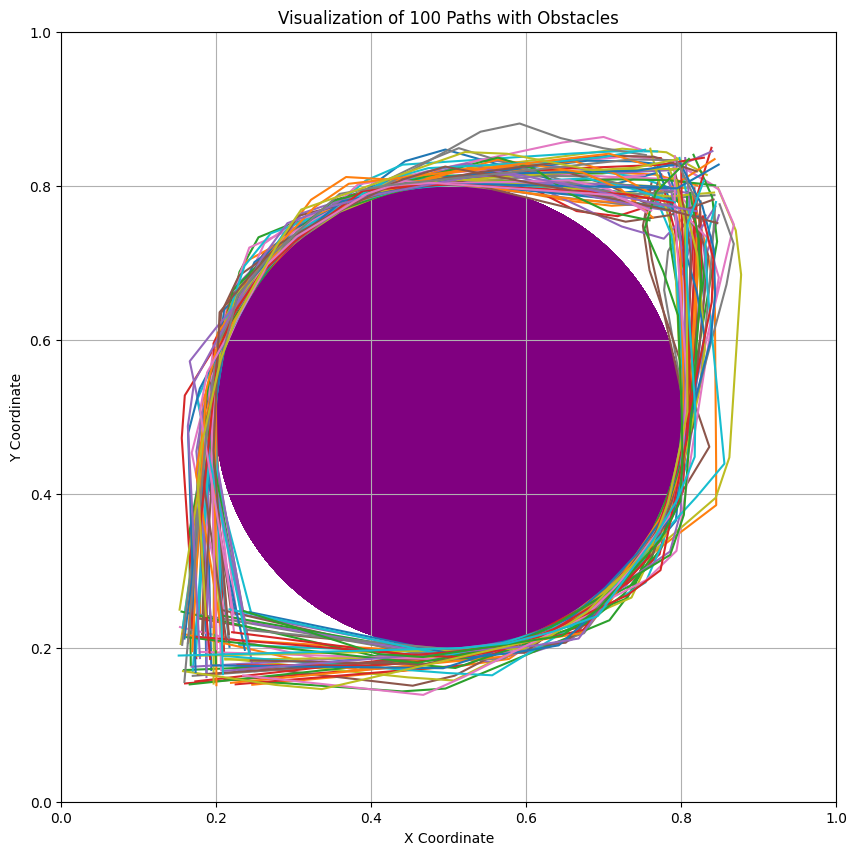

In [6]:
# Visualize n paths with obstacles
n = 100  # Number of paths to visualize

plt.figure(figsize=(10, 10))

for i in range(n):
    selected_obstacles = obstacles[i]  # Get obstacles for the sample
    selected_trajectory = trajectories[i]  # Get trajectory for the sample

    # Plot the obstacles
    for ox, oy, r in selected_obstacles:
        circle = plt.Circle((ox, oy), r, color='purple', alpha=0.3, label='Obstacle' if i == 0 else None)
        plt.gca().add_patch(circle)

    # Plot the trajectory
    plt.plot(selected_trajectory[:, 0], selected_trajectory[:, 1], label=f'Trajectory {i+1}')

# Set plot limits and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title(f"Visualization of {n} Paths with Obstacles")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()

Total trajectories: 500
Upward paths: 259
Downward paths: 241


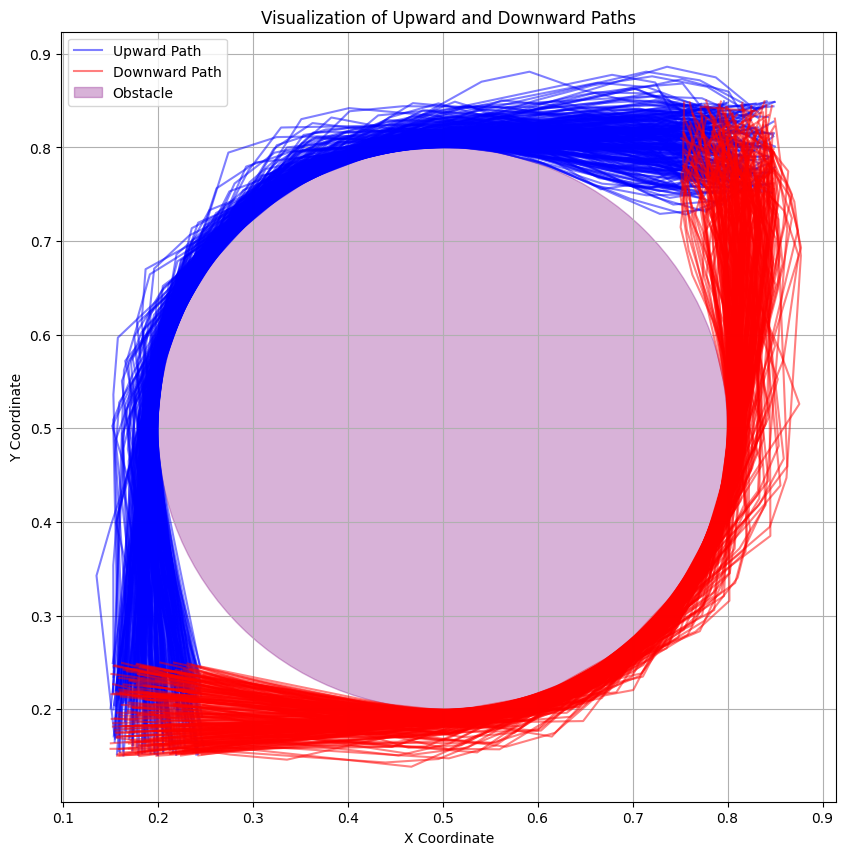

In [7]:
import numpy as np
from gen_data import save_data

# Load the dataset
dataset_path = 'data/pd_500.npz'  # Update path if needed
data = np.load(dataset_path, allow_pickle=True)

# Extract data
starts = data['starts']  # (500, 2) -> [x, y]
goals = data['goals']  # (500, 2) -> [x, y]
obstacles = data['obstacles']  # (500, 1, 3) -> [x, y, radius]
trajectories = data['trajectories']  # (500, 20, 2) -> sequence of (x, y) points

# Lists to store classified trajectories
upward_paths = []
downward_paths = []

for i in range(len(trajectories)):
    traj = trajectories[i]  # (20, 2)
    obstacle_center_y = obstacles[i, 0, 1]  # Get y-coordinate of the obstacle center

    # Count how many trajectory points are above or below the obstacle center
    above_count = np.sum(traj[:, 1] > obstacle_center_y)
    below_count = np.sum(traj[:, 1] < obstacle_center_y)

    # Classify the trajectory based on majority rule
    if above_count > below_count:
        upward_paths.append({
                    'start': starts[i],
                    'goal': goals[i],
                    'obstacles': obstacles[i],
                    'trajectory': traj,
                })
    else:
        downward_paths.append({
                    'start': starts[i],
                    'goal': goals[i],
                    'obstacles': obstacles[i],
                    'trajectory': traj,
                })

# Print statistics
print(f"Total trajectories: {len(trajectories)}")
print(f"Upward paths: {len(upward_paths)}")
print(f"Downward paths: {len(downward_paths)}")


# Visualize upward and downward paths

plt.figure(figsize=(10, 10))

# Plot upward paths
for path in upward_paths:
    plt.plot(path['trajectory'][:, 0], path['trajectory'][:, 1], color='blue', alpha=0.5, label='Upward Path' if 'Upward Path' not in plt.gca().get_legend_handles_labels()[1] else "")

# Plot downward paths
for path in downward_paths:
    plt.plot(path['trajectory'][:, 0], path['trajectory'][:, 1], color='red', alpha=0.5, label='Downward Path' if 'Downward Path' not in plt.gca().get_legend_handles_labels()[1] else "")

# Overlay the obstacle
for ox, oy, r in selected_obstacles:
    circle = plt.Circle((ox, oy), r, color='purple', alpha=0.3, label='Obstacle' if 'Obstacle' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.gca().add_patch(circle)

plt.title("Visualization of Upward and Downward Paths")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.show()


# Save results
save_data(upward_paths, 'data/upward_paths.npz')
save_data(downward_paths, 'data/downward_paths.npz')


Found similar trajectories:
Combined dataset saved as 'data/pd_2.npz'


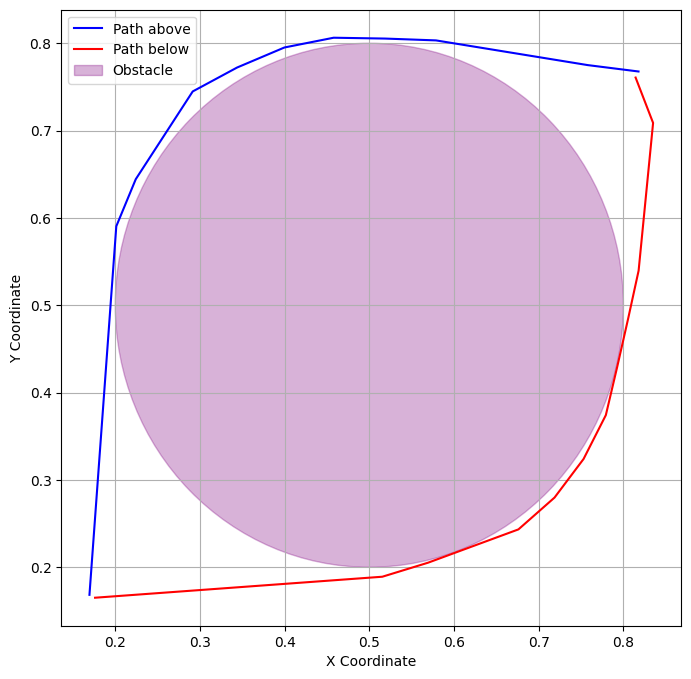

In [15]:
# Choose one above and one below trajectory which has almost the same start and goal
# Find one trajectory from upward_paths and one from downward_paths with similar start and goal
def find_similar_trajectories(upward_paths, downward_paths, threshold=0.05):
    for up_path in upward_paths:
        for down_path in downward_paths:
            start_diff = np.linalg.norm(up_path['start'] - down_path['start'])
            goal_diff = np.linalg.norm(up_path['goal'] - down_path['goal'])
            if start_diff < threshold and goal_diff < threshold:
                return up_path, down_path
    return None, None

# Set a threshold for similarity
threshold = 0.01

# Find the trajectories
up_trajectory, down_trajectory = find_similar_trajectories(upward_paths, downward_paths, threshold)

# Display the results
if up_trajectory and down_trajectory:
    print("Found similar trajectories:")
    
    # Combine the two trajectories into one dataset
    combined_dataset = [
        {
            'start': up_trajectory['start'],
            'goal': up_trajectory['goal'],
            'obstacles': up_trajectory['obstacles'],
            'trajectory': up_trajectory['trajectory']
        },
        {
            'start': down_trajectory['start'],
            'goal': down_trajectory['goal'],
            'obstacles': down_trajectory['obstacles'],
            'trajectory': down_trajectory['trajectory']
        }
    ]

    # Save the combined dataset
    save_data(combined_dataset, 'data/pd_2.npz')
    print("Combined dataset saved as 'data/pd_2.npz'")
    
    
    # Plot the upward trajectory
    plt.figure(figsize=(8, 8))
    plt.plot(up_trajectory['trajectory'][:, 0], up_trajectory['trajectory'][:, 1], label='Path above', color='blue')
    
    # Plot the downward trajectory
    plt.plot(down_trajectory['trajectory'][:, 0], down_trajectory['trajectory'][:, 1], label='Path below', color='red')
    
    # Overlay the obstacles
    for ox, oy, r in up_trajectory['obstacles']:
        circle = plt.Circle((ox, oy), r, color='purple', alpha=0.3, label='Obstacle' if 'Obstacle' not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.gca().add_patch(circle)
    
    # plt.title("Similar Upward and Downward Trajectories")
    plt.xlabel("X Coordinate")
    
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No similar trajectories found within the threshold.")

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_237577/446215774.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Plot of $e^{-5 \cdot distance^2}$')


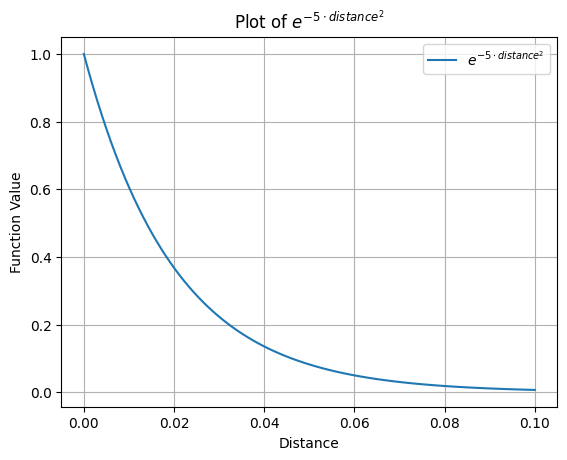

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the distance range from 0 to 1
distance = np.linspace(0, 0.1, 100)

# Compute the function values
y = np.exp(-50 * distance)

# Plot the graph
plt.plot(distance, y, label=r'$e^{-5 \cdot distance^2}$')
plt.xlabel('Distance')
plt.ylabel('Function Value')
plt.title('Plot of $e^{-5 \cdot distance^2}$')
plt.grid(True)
plt.legend()
plt.show()

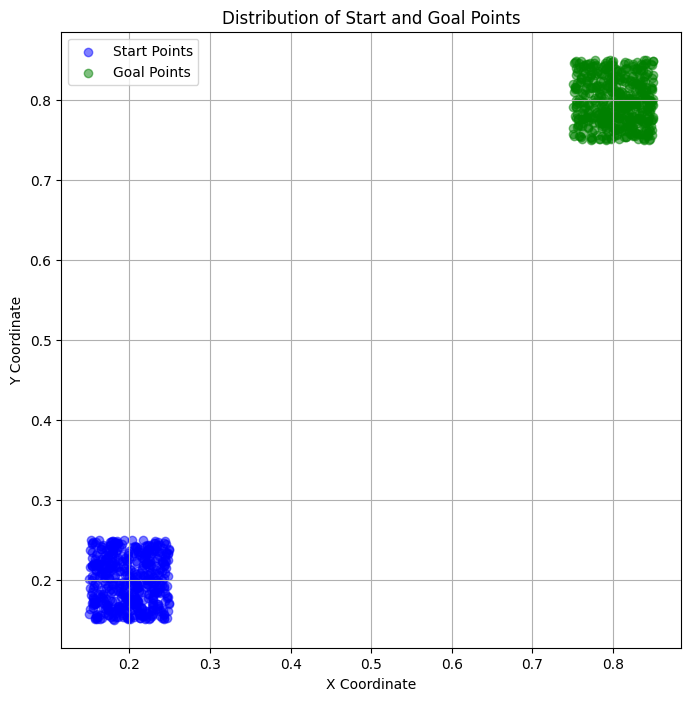

In [9]:
# Plot distribution of the goal points and start points
plt.figure(figsize=(8, 8))
plt.scatter(starts[:, 0], starts[:, 1], c='blue', label='Start Points', alpha=0.5)
plt.scatter(goals[:, 0], goals[:, 1], c='green', label='Goal Points', alpha=0.5)
plt.title('Distribution of Start and Goal Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

Delta Statistics:
X Dimension - Mean: 0.0000, Std: 0.0315
Y Dimension - Mean: 0.0004, Std: 0.0308


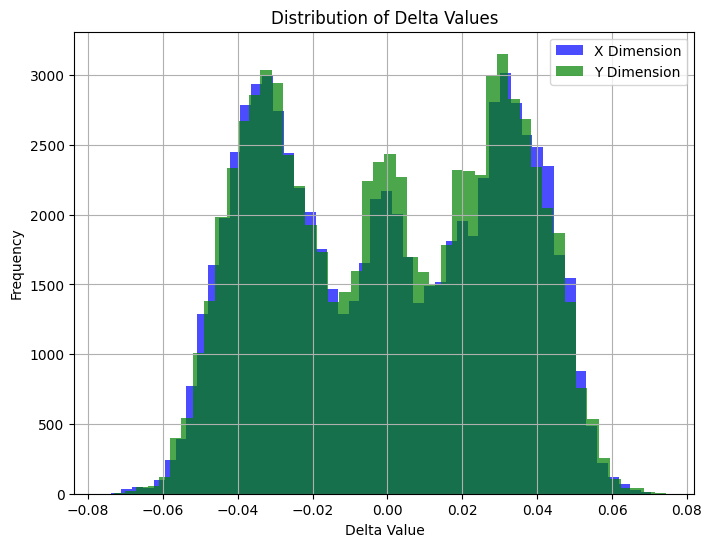

In [10]:
import numpy as np
import torch
from data_loader import PlanningDataset

# Load the dataset
data_path = 'data/pd_4k.npz'  # Update this path if needed
dataset = PlanningDataset(data_path)

# Collect all delta values
deltas = np.array([sample['delta'].numpy() for sample in dataset])  # Shape: [num_samples, 2]

# Compute statistics for x and y dimensions
delta_x = deltas[:, 0]
delta_y = deltas[:, 1]

mean_x, std_x = np.mean(delta_x), np.std(delta_x)
mean_y, std_y = np.mean(delta_y), np.std(delta_y)

# Display the statistics
print("Delta Statistics:")
print(f"X Dimension - Mean: {mean_x:.4f}, Std: {std_x:.4f}")
print(f"Y Dimension - Mean: {mean_y:.4f}, Std: {std_y:.4f}")

# Plot the distribution of delta values
plt.figure(figsize=(8, 6))
plt.hist(delta_x, bins=50, color='blue', alpha=0.7, label='X Dimension')
plt.hist(delta_y, bins=50, color='green', alpha=0.7, label='Y Dimension')
plt.title('Distribution of Delta Values')
plt.xlabel('Delta Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

 

# Import Required Libraries
Import necessary libraries such as NumPy, Matplotlib, and Stable-Baselines3.

In [2]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from simple_2d import Simple2DEnv
from models.custom_policy import CustomActorCriticPolicy
from models.features_extractor import FeaturesExtractor
from models.neural_planner import PolicyNet

# Initialize Environment and Model
Set up the Simple2DEnv environment and load the pre-trained PPO model.

In [9]:
# Initialize the environment with reference data
dataset_path = 'data/pd_500.npz'  # Path to the dataset
reference = np.load(dataset_path, allow_pickle=True)  # Load reference data

# Create the Simple2DEnv environment
env = Simple2DEnv(reference=reference, rand_sg=False)

# Load the pre-trained PPO model
model_path = "checkpoints/best_model_rand/best_model.zip"  # Path to the model
model = PPO.load(model_path)  # Load the model


# # Load Pre-trained model
# # Create environment
# policy_kwargs = dict(
# features_extractor_class=FeaturesExtractor,
# features_extractor_kwargs=dict(features_dim=64),
# )
# model = PPO(
#     CustomActorCriticPolicy,
#     env,
#     policy_kwargs=policy_kwargs,
#     verbose=1)

# # Load the Pre-trained model
# pretrained_model = PolicyNet(feature_extractor= model.policy.features_extractor, custom_policy= model.policy)
# pretrained_model.load_state_dict(torch.load("checkpoints/sl_mixed/best_model.pth", weights_only=True))

# # Load weights into the existing components (DO NOT replace the modules)
# model.policy.features_extractor.load_state_dict(pretrained_model.feature_extractor.state_dict())
# model.policy.mlp_extractor.policy_net.load_state_dict(pretrained_model.policy_net.state_dict())
# model.policy.action_net.load_state_dict(pretrained_model.action_net.state_dict())

# Interactive Start and Goal Adjustment
Use widgets like ipywidgets to allow users to dynamically adjust the start and goal positions.

In [ ]:
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt

# Function to update the environment with new start and goal positions
def update_positions(start_x, start_y, goal_x, goal_y):
    # Reset the environment
    _, _ = env.reset()
    # Update the environment's start and goal positions
    env.start = np.array([start_x, start_y])
    env.state = env.start
    env.goal = np.array([goal_x, goal_y])
    obs = env._get_obs()
    
    
    # Initialize variables for the rollout
    rollout = []
    done = False
    
    # Perform a rollout using the trained model
    while not done:
        rollout.append(obs["current"].copy())
        action, _ = model.predict(obs, deterministic=True)
        obs, _, done, _, _ = env.step(action)
    
    # Convert rollout to a numpy array
    rollout = np.array(rollout)
    
    # Plot the updated environment
    plt.figure(figsize=(8, 8))
    plt.xlim(env.bounds[0])
    plt.ylim(env.bounds[1])
    plt.grid(True)
    
    # Plot start, goal, and obstacles
    plt.scatter(*env.start, color='blue', label='Start', s=100)
    plt.scatter(*env.goal, color='green', label='Goal', s=100)
    for ox, oy, r in env.obstacles:
        circle = plt.Circle((ox, oy), r, color='red', alpha=0.5)
        plt.gca().add_patch(circle)
    
    # Plot the model rollout
    plt.plot(rollout[:, 0], rollout[:, 1], 'b-', label='Trained Model Rollout')
    plt.scatter(rollout[:, 0], rollout[:, 1], color='blue', s=10, label='Rollout Points')
    
    plt.legend()
    plt.title("Dynamic Start and Goal Adjustment")
    plt.show()

# Create interactive sliders for start and goal positions
interact(
    update_positions,
    start_x=FloatSlider(min=env.bounds[0][0], max=env.bounds[0][1], step=0.05, value=env.start[0], description='Start X'),
    start_y=FloatSlider(min=env.bounds[1][0], max=env.bounds[1][1], step=0.05, value=env.start[1], description='Start Y'),
    goal_x=FloatSlider(min=env.bounds[0][0], max=env.bounds[0][1], step=0.05, value=env.goal[0], description='Goal X'),
    goal_y=FloatSlider(min=env.bounds[1][0], max=env.bounds[1][1], step=0.05, value=env.goal[1], description='Goal Y')
)

interactive(children=(FloatSlider(value=0.0, description='Start X', max=1.0, step=0.05), FloatSlider(value=0.0…

<function __main__.update_positions(start_x, start_y, goal_x, goal_y)>